# **Import Library**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from tabulate import tabulate

# **Read Dataset**

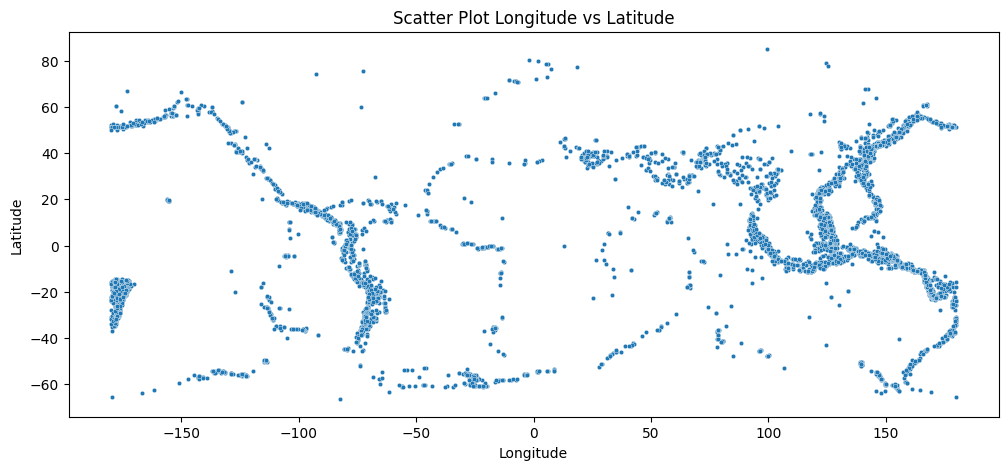

,time,latitude,longitude,depth,mag,magType,place
0,2017-12-15T16:47:58.230Z,-7.4921,108.1743,90.0,6.5,mww,"1km E of Kampungbaru, Indonesia"
1,2017-12-13T18:03:43.920Z,-54.2189,2.1628,17.0,6.5,mww,"80km WNW of Bouvet Island, Bouvet Island"
2,2017-12-12T21:41:31.140Z,30.8275,57.2982,8.0,6.0,mww,"63km NNE of Kerman, Iran"
3,2017-12-12T08:43:18.320Z,30.7372,57.2795,12.0,6.0,mww,"53km NNE of Kerman, Iran"
4,2017-12-09T15:14:24.770Z,10.0928,140.2016,10.0,6.1,mww,"50km NW of Fais, Micronesia"


In [3]:
# Mengunduh dataset dan membaca sebagai DataFrame
dataset_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/eq_1970_M6.csv"
df = pd.read_csv(dataset_url)

# Perbesar ukuran figure
plt.figure(figsize=(12, 5))

# Plot scatter berdasarkan longitude dan latitude
sns.scatterplot(x='longitude', y='latitude', data=df, s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot Longitude vs Latitude')
plt.show()

df.head(5)



Tabel Negara dari Setiap Klaster:
╒═══════════╤═════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════╕
│ Cluster   │ Negara                                                                                      │ Jumlah Negara   │
╞═══════════╪═════════════════════════════════════════════════════════════════════════════════════════════╪═════════════════╡
│ 0         │ Ecuador, Chile, Mexico, Peru, Guatemala, Bolivia, Argentina, Canada, Brazil, Colombia       │ 17              │
├───────────┼─────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────┤
│           │ Nicaragua, Barbuda, Barbados, Panama, Venezuela, Portugal, Honduras                         │                 │
├───────────┼─────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────┤
│ 1         │ Indonesia, Micronesia, Japan, Alaska, Vanuatu, Philippines, Russia, F

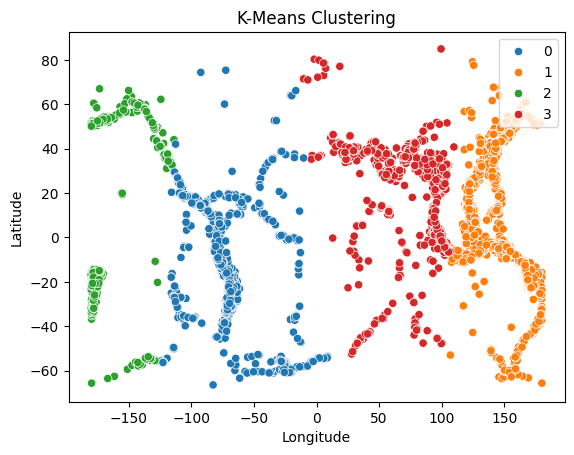

In [4]:
from sklearn.cluster import KMeans
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ekstraksi nama negara dari kolom "place" menggunakan regex
df['Country'] = df['place'].str.extract(r', (\w+)$')

# Mengambil fitur yang digunakan untuk klastering (longitude dan latitude)
X = df[['longitude', 'latitude']]

# Menerapkan K-Means clustering
n_clusters = 4  # Ganti dengan jumlah klaster yang diinginkan
clustering_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = clustering_model.fit_predict(X)

# Plot hasil klastering dengan warna yang berbeda
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', palette='tab10', data=df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering')

# Memindahkan legenda ke pojok kanan atas
plt.legend(loc='upper right')

# ============================================================
# Buat tabel hasil klaster berisi negara per cluster
# ============================================================
clusters_data = []
for cluster_id in range(n_clusters):
    places_in_cluster = df.loc[df['Cluster'] == cluster_id, 'Country'].dropna().unique()
    num_countries = len(places_in_cluster)

    if num_countries <= 10:
        cluster_info = [cluster_id, ', '.join(places_in_cluster), num_countries]
        clusters_data.append(cluster_info)
    else:
        for i in range(0, num_countries, 10):
            end_idx = min(i + 10, num_countries)
            if i == 0:
                cluster_info = [cluster_id, ', '.join(places_in_cluster[i:end_idx]), num_countries]
                clusters_data.append(cluster_info)
            else:
                cluster_info = ['', ', '.join(places_in_cluster[i:end_idx]), '']
                clusters_data.append(cluster_info)

clusters_table = pd.DataFrame(clusters_data, columns=['Cluster', 'Negara', 'Jumlah Negara'])

# Cetak tabel dengan format rapi
print("\nTabel Negara dari Setiap Klaster:")
print(tabulate(clusters_table, headers='keys', tablefmt='fancy_grid', showindex=False))

plt.show()


Jumlah cluster: 4, Silhouette Score: 0.5131
Jumlah cluster: 5, Silhouette Score: 0.4774
Jumlah cluster: 6, Silhouette Score: 0.5034
Jumlah cluster: 7, Silhouette Score: 0.5474
Jumlah cluster: 8, Silhouette Score: 0.5557
Jumlah cluster: 9, Silhouette Score: 0.5541
Jumlah cluster: 10, Silhouette Score: 0.5318

Jumlah cluster optimal = 8

Tabel Negara dari Setiap Klaster:
╒═══════════╤═════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════╕
│ Cluster   │ Negara                                                                                      │ Jumlah Negara   │
╞═══════════╪═════════════════════════════════════════════════════════════════════════════════════════════╪═════════════════╡
│ 0         │ Indonesia, Micronesia, China, Philippines, Japan, India, Burma, Taiwan, Australia, France   │ 12              │
├───────────┼─────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────

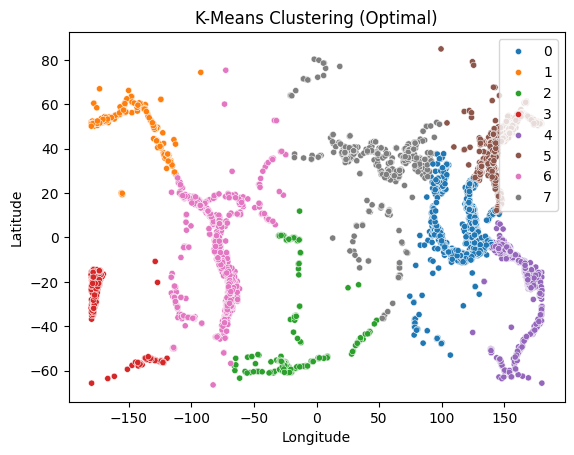

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ekstraksi nama negara dari kolom "place" menggunakan regex
df['Country'] = df['place'].str.extract(r', (\w+)$')

# Mengambil fitur yang digunakan untuk klastering
X = df[['longitude', 'latitude']]

# ============================================================
# 1. Mencari jumlah cluster optimal dengan Silhouette Score
# ============================================================
sil_scores = {}
for k in range(4, 11):   # cari cluster dari 4 sampai 10
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores[k] = score
    print(f"Jumlah cluster: {k}, Silhouette Score: {score:.4f}")

# Ambil jumlah cluster optimal
n_clusters = max(sil_scores, key=sil_scores.get)
print("\nJumlah cluster optimal =", n_clusters)

# ============================================================
# 2. Lanjut klastering menggunakan jumlah cluster optimal
# ============================================================
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans_model.fit_predict(X)

# Plot hasil klastering
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='Cluster',
    palette='tab10',
    data=df,
    s=20
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering (Optimal)')
plt.legend(loc='upper right')

# ============================================================
# 3. Buat tabel negara di setiap cluster
# ============================================================
clusters_data = []
for cluster_id in range(n_clusters):
    places_in_cluster = df.loc[df['Cluster'] == cluster_id, 'Country'].dropna().unique()
    num_countries = len(places_in_cluster)

    if num_countries <= 10:
        cluster_info = [cluster_id, ', '.join(places_in_cluster), num_countries]
        clusters_data.append(cluster_info)
    else:
        for i in range(0, num_countries, 10):
            end_idx = min(i + 10, num_countries)
            if i == 0:
                cluster_info = [cluster_id, ', '.join(places_in_cluster[i:end_idx]), num_countries]
                clusters_data.append(cluster_info)
            else:
                cluster_info = ['', ', '.join(places_in_cluster[i:end_idx]), '']
                clusters_data.append(cluster_info)

clusters_table = pd.DataFrame(clusters_data, columns=['Cluster', 'Negara', 'Jumlah Negara'])

# Cetak tabel dengan rapi
print("\nTabel Negara dari Setiap Klaster:")
print(tabulate(clusters_table, headers='keys', tablefmt='fancy_grid', showindex=False))

plt.show()


Jumlah cluster: 4, Silhouette Score: 0.5131
Jumlah cluster: 5, Silhouette Score: 0.4774
Jumlah cluster: 6, Silhouette Score: 0.5034
Jumlah cluster: 7, Silhouette Score: 0.5474
Jumlah cluster: 8, Silhouette Score: 0.5557
Jumlah cluster: 9, Silhouette Score: 0.5541
Jumlah cluster: 10, Silhouette Score: 0.5318

Jumlah cluster optimal = 8


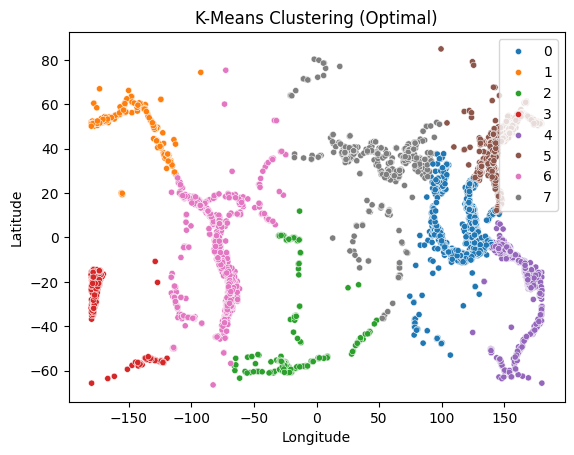


Tabel Negara dari Setiap Klaster:
╒═══════════╤═════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════╕
│ Cluster   │ Negara                                                                                      │ Jumlah Negara   │
╞═══════════╪═════════════════════════════════════════════════════════════════════════════════════════════╪═════════════════╡
│ 0         │ Indonesia, Micronesia, China, Philippines, Japan, India, Burma, Taiwan, Australia, France   │ 12              │
├───────────┼─────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────┤
│           │ Malaysia, Thailand                                                                          │                 │
├───────────┼─────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────┤
│ 1         │ Alaska, Canada, California, Mexico, MX, Hawaii, Washington, CA, Russi

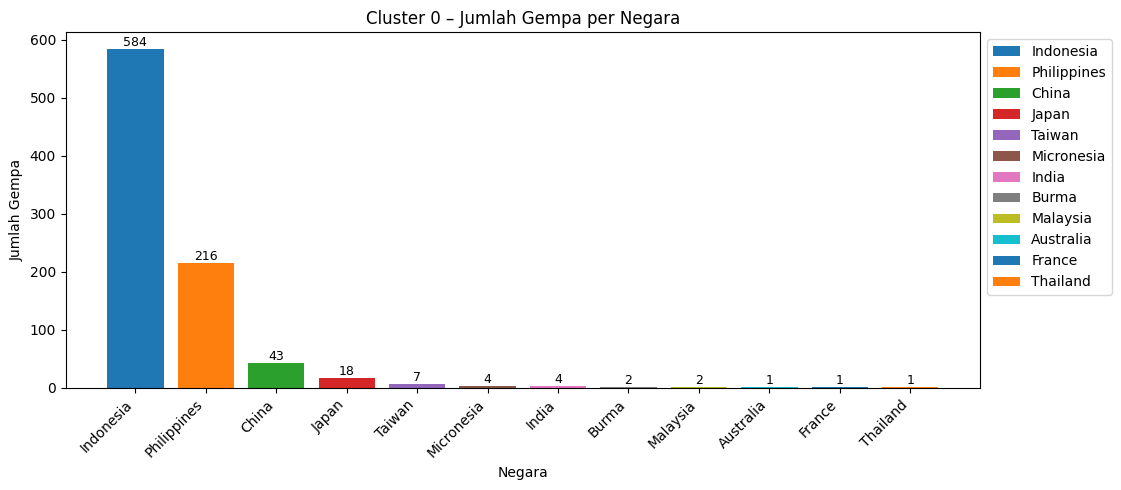

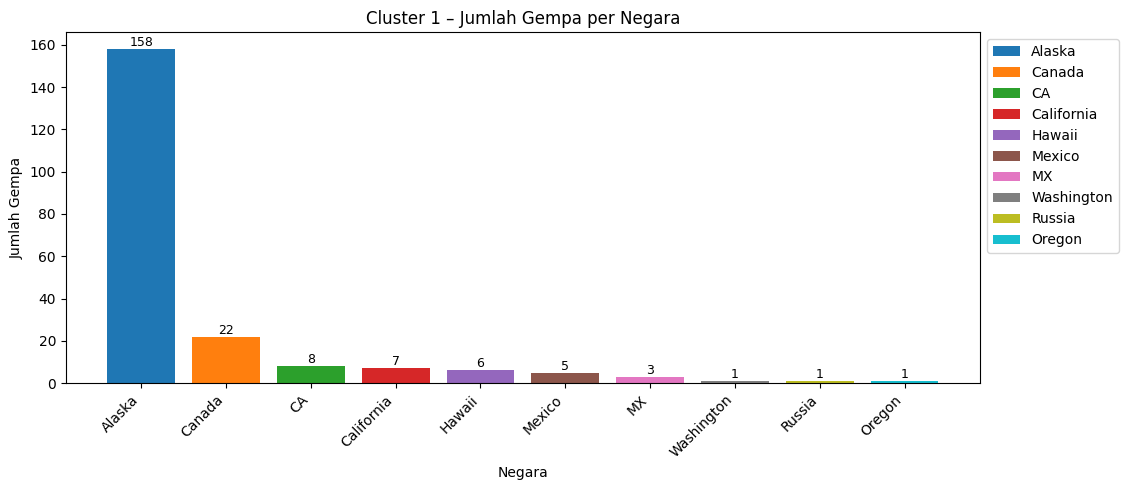

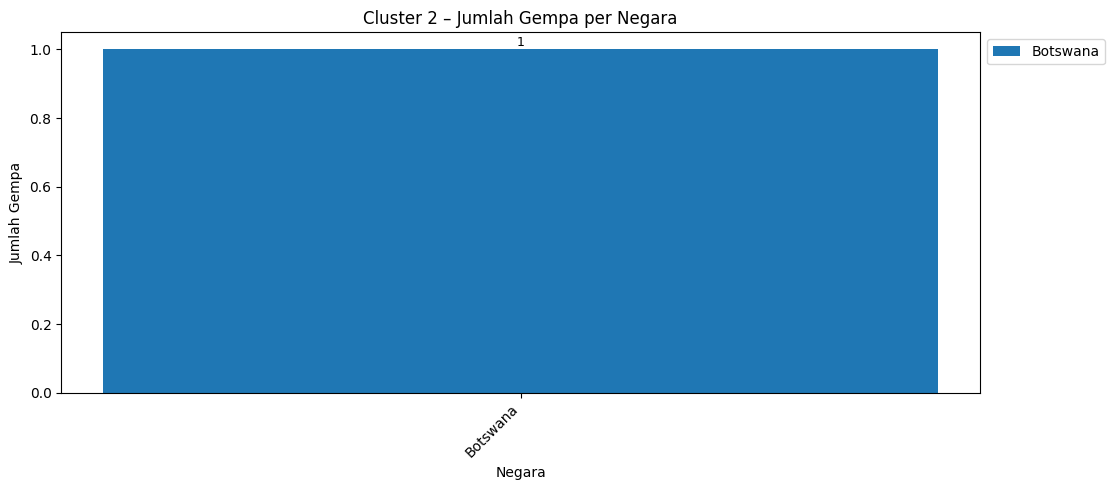

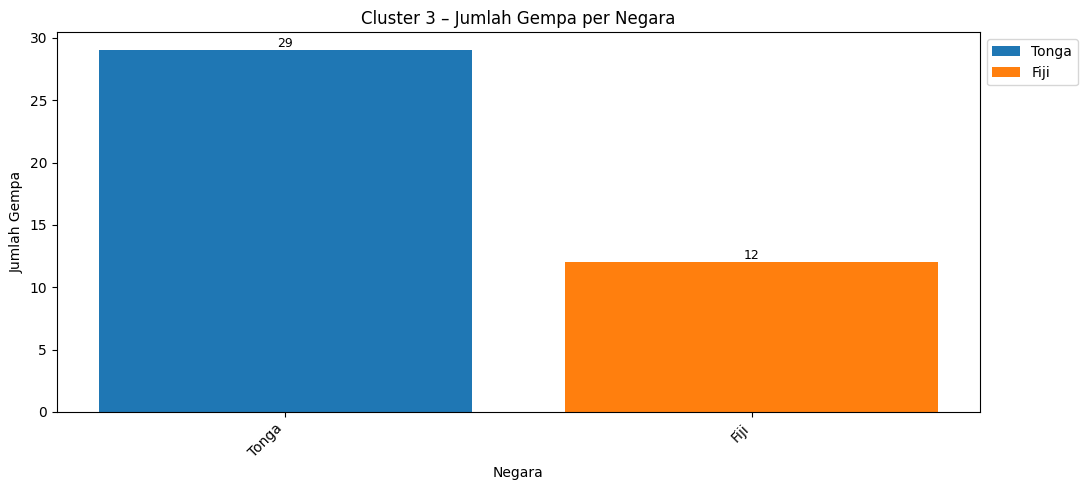

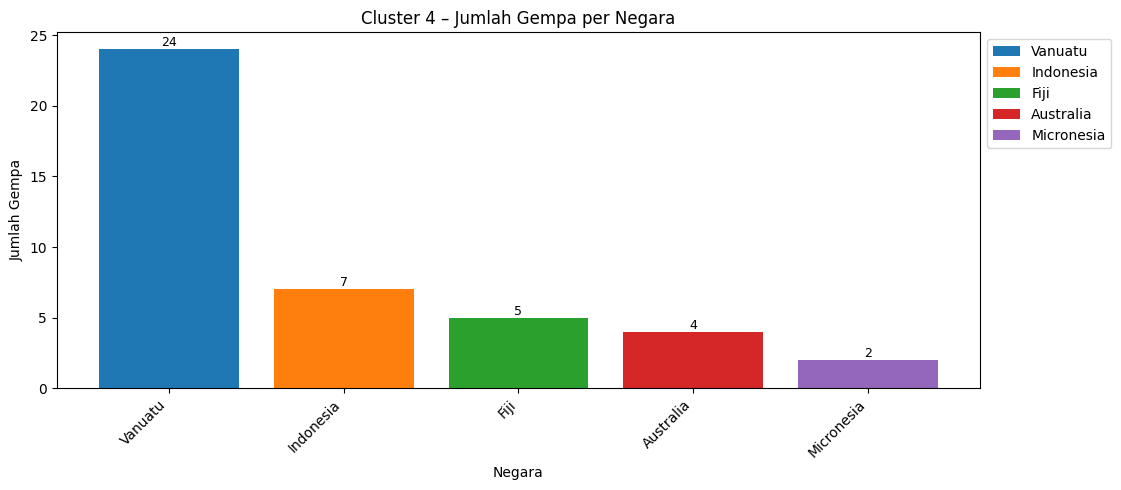

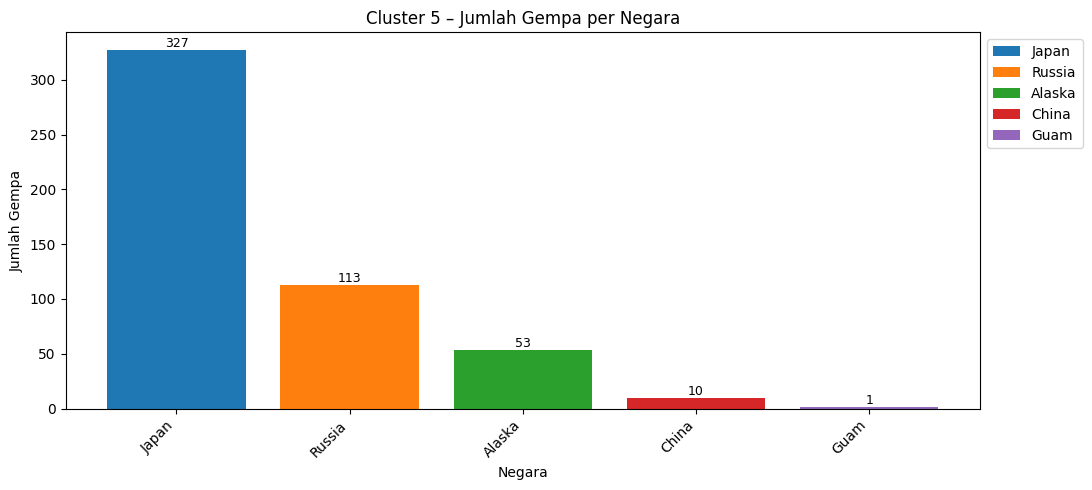

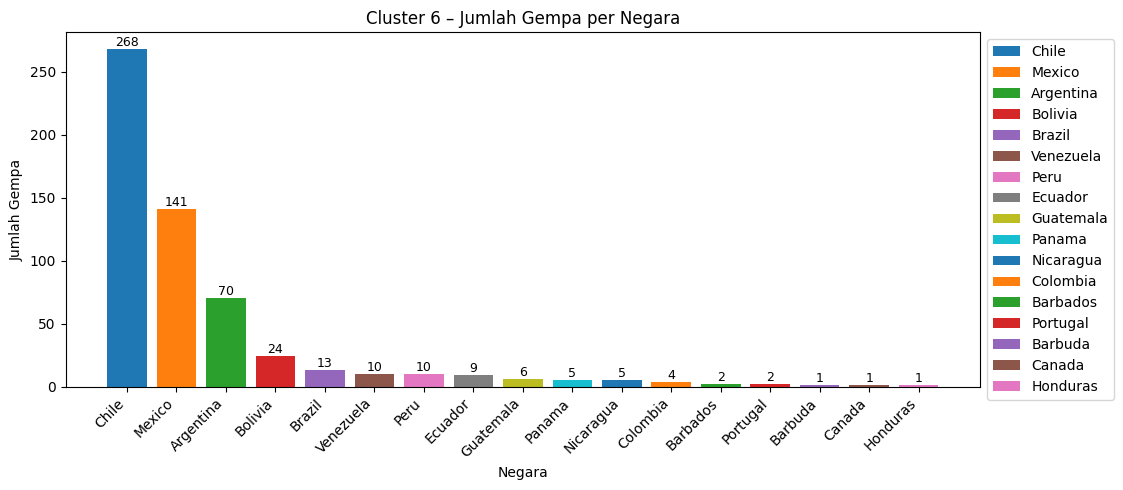

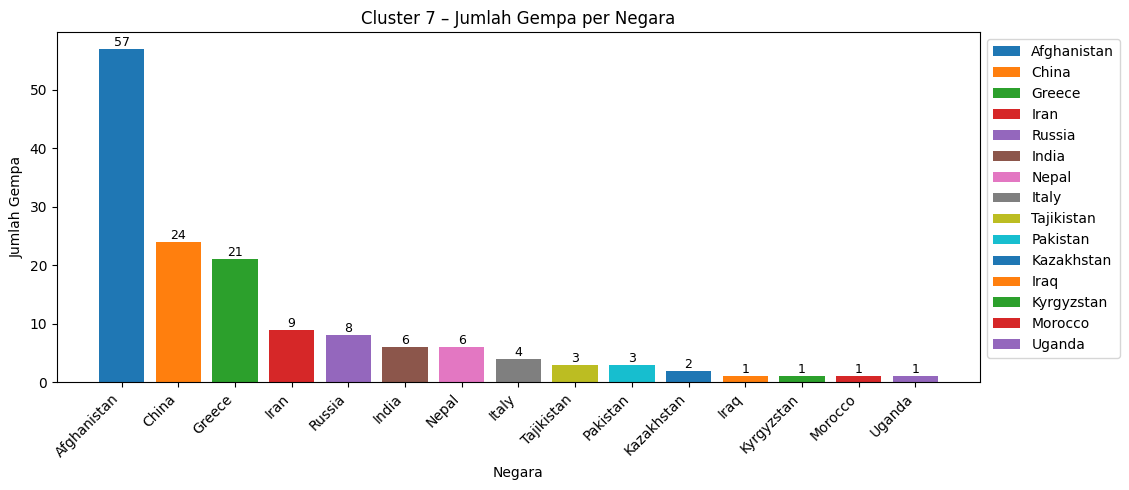

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ekstraksi nama negara dari kolom "place"
df['Country'] = df['place'].str.extract(r', (\w+)$')

# Mengambil fitur klastering
X = df[['longitude', 'latitude']]

# ============================================================
# 1. MENCARI JUMLAH CLUSTER OPTIMAL (Silhouette Score)
# ============================================================
sil_scores = {}
for k in range(4, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores[k] = score
    print(f"Jumlah cluster: {k}, Silhouette Score: {score:.4f}")

n_clusters = max(sil_scores, key=sil_scores.get)
print("\nJumlah cluster optimal =", n_clusters)

# ============================================================
# 2. CLUSTERING DENGAN K-MEANS
# ============================================================
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans_model.fit_predict(X)

sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='Cluster',
    palette='tab10',
    data=df,
    s=20
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering (Optimal)')
plt.legend(loc='upper right')
plt.show()

# ============================================================
# 3. TABEL NEGARA TIAP CLUSTER
# ============================================================
clusters_data = []
for cluster_id in range(n_clusters):
    places_in_cluster = df.loc[df['Cluster'] == cluster_id, 'Country'].dropna().unique()
    num_countries = len(places_in_cluster)

    if num_countries <= 10:
        cluster_info = [cluster_id, ', '.join(places_in_cluster), num_countries]
        clusters_data.append(cluster_info)
    else:
        for i in range(0, num_countries, 10):
            end_idx = min(i + 10, num_countries)
            if i == 0:
                cluster_info = [cluster_id, ', '.join(places_in_cluster[i:end_idx]), num_countries]
                clusters_data.append(cluster_info)
            else:
                cluster_info = ['', ', '.join(places_in_cluster[i:end_idx]), '']
                clusters_data.append(cluster_info)

clusters_table = pd.DataFrame(clusters_data, columns=['Cluster', 'Negara', 'Jumlah Negara'])

print("\nTabel Negara dari Setiap Klaster:")
print(tabulate(clusters_table, headers='keys', tablefmt='fancy_grid', showindex=False))

# ============================================================
# 4. BAR CHART: JUMLAH GEMPA PER NEGARA DI SETIAP CLUSTER
# ============================================================
for cluster_id in range(n_clusters):
    cluster_df = df[df['Cluster'] == cluster_id]

    # hitung jumlah gempa per negara
    country_counts = cluster_df['Country'].value_counts()

    # skip kalau tidak ada data
    if country_counts.empty:
        continue

    # plot barchart
    plt.figure(figsize=(10, 5))
    bars = plt.bar(country_counts.index, country_counts.values,
                   color=sns.color_palette("tab10", len(country_counts)))

    plt.title(f"Cluster {cluster_id} – Jumlah Gempa per Negara")
    plt.xlabel("Negara")
    plt.ylabel("Jumlah Gempa")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # label angka di atas bar
    for bar, val in zip(bars, country_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, val, str(val),
                 ha='center', va='bottom', fontsize=9)

    # legend di kanan
    plt.legend(bars, country_counts.index, loc='upper left', bbox_to_anchor=(1,1))

    plt.show()


Mencari jumlah cluster optimal...

Jumlah cluster: 4, Silhouette Score: 0.3814
Jumlah cluster: 5, Silhouette Score: 0.3944
Jumlah cluster: 6, Silhouette Score: 0.3878
Jumlah cluster: 7, Silhouette Score: 0.3923

Jumlah cluster optimal = 5


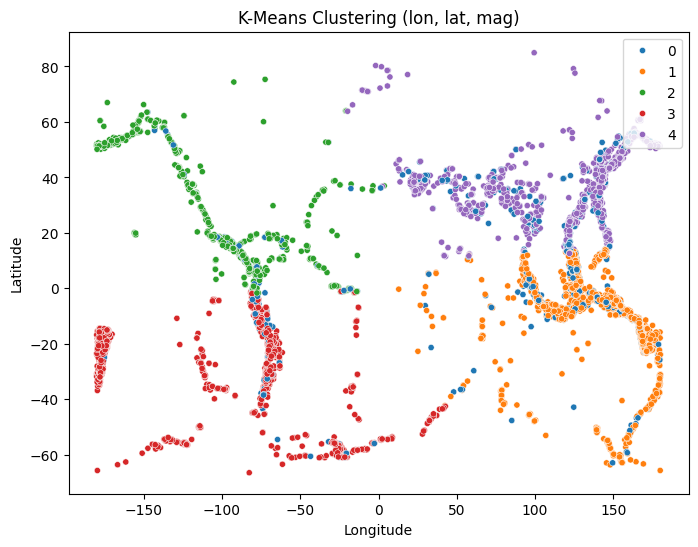


Tabel Negara dari Setiap Klaster:
╒═══════════╤═════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════╕
│ Cluster   │ Negara                                                                                          │ Jumlah Negara   │
╞═══════════╪═════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════════╡
│ 0         │ Iraq, Mexico, Russia, Philippines, Fiji, Chile, Japan, Burma, Ecuador, Vanuatu                  │ 30              │
├───────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────┤
│           │ Indonesia, Tajikistan, Brazil, Peru, Afghanistan, Nepal, Alaska, Greece, China, Pakistan        │                 │
├───────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────┤
│           │ Tonga, Iran, Colombia, Canada, India, Arg

In [8]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 0. Ekstraksi nama negara dari kolom "place"
# ============================================================
df['Country'] = df['place'].str.extract(r', (\w+)$')

# ============================================================
# 1. Pilih fitur untuk clustering (longitude, latitude, magnitude)
# ============================================================
X = df[['longitude', 'latitude', 'mag']]

# Normalize / scaling fitur (sangat penting!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================================
# 2. Mencari jumlah cluster optimal dengan Silhouette Score
# ============================================================
sil_scores = {}
print("Mencari jumlah cluster optimal...\n")

for k in range(4, 8):  # eksplorasi 4–10 cluster
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score
    print(f"Jumlah cluster: {k}, Silhouette Score: {score:.4f}")

# jumlah cluster terbaik
n_clusters = max(sil_scores, key=sil_scores.get)
print("\nJumlah cluster optimal =", n_clusters)

# ============================================================
# 3. Klastering final memakai cluster optimal
# ============================================================
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans_model.fit_predict(X_scaled)

# ============================================================
# 4. Visualisasi hasil klastering (berdasarkan lokasi)
# ============================================================
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='Cluster',
    palette='tab10',
    data=df,
    s=20
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering (lon, lat, mag)')
plt.legend(loc='upper right')
plt.show()

# ============================================================
# 5. Buat tabel negara di setiap cluster
# ============================================================
clusters_data = []

for cluster_id in range(n_clusters):
    places_in_cluster = df.loc[df['Cluster'] == cluster_id, 'Country'].dropna().unique()
    num_countries = len(places_in_cluster)

    if num_countries <= 10:
        clusters_data.append([
            cluster_id,
            ', '.join(places_in_cluster),
            num_countries
        ])
    else:
        for i in range(0, num_countries, 10):
            end_idx = min(i + 10, num_countries)
            if i == 0:
                clusters_data.append([
                    cluster_id,
                    ', '.join(places_in_cluster[i:end_idx]),
                    num_countries
                ])
            else:
                clusters_data.append([
                    '',
                    ', '.join(places_in_cluster[i:end_idx]),
                    ''
                ])

clusters_table = pd.DataFrame(clusters_data,
                              columns=['Cluster', 'Negara', 'Jumlah Negara'])

print("\nTabel Negara dari Setiap Klaster:")
print(tabulate(clusters_table,
               headers='keys',
               tablefmt='fancy_grid',
               showindex=False))
